In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.datasets import mnist 
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
import numpy as np

В нейронной сети должно быть 3 Dense-слоя: два скрытых слоя, состоящих из 128 нейронов каждый, и выходной слой. Активационные функции на скрытых слоях relu, на выходном - softmax.

В качестве ответа необходимо указать количество оптимизируемых параметров (Trainable params) в виде целого числа
и прикрепить к ответу подробное решение с кодом в виде файла или архива с файлами.

In [4]:
#грузим датасет и определяем обучающую и тестовую выборки
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [5]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [6]:
#Какие-то сложные хрени для того, чтобы память поменьше загружать
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [7]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
#наполняем модель в соотвествии с заданием. входной вектор равен 784 (28*28), выходной, очевидно 10, т.к. 10 цифр и мы решаем задачу классификации 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #фактически преобразовываем матрицу 28*28 в вектор, длинной  784
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=100,
    validation_data=ds_test,
)

In [9]:
print(model.summary())  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


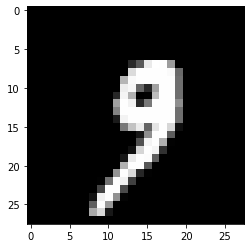

In [20]:
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
n_rec = 1000
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [21]:
#я за 1.5 часа не успел разобраться как из того конвеера вытащить вектор цифры, поэтому вытаскиваю его из другого формата датасета (загрузил его дважды), но это и не вредно, мы же передаем вектор изображения, какая разница откуда?
#Выбираем нужную картинку из тестовой выборки
x = x_test_org[n_rec]
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массов примеров для распознавания
#Мы делаем массив из одного примеры
x = np.expand_dims(x, axis=0)

In [22]:
#Распознаём ннаш пример
prediction = model.predict(x)
print(prediction)
prediction = np.argmax(prediction)
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
9


Зашибись. Четко